In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [18,10]

In [3]:
non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']
regression = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch', 'BMI']

def load_ansur(cols_to_drop, test_size, model_type='class'):
    df_m = pd.read_csv('data/ANSUR_II_MALE.csv')
    df_f = pd.read_csv('data/ANSUR_II_FEMALE.csv')
    ansur_df = pd.concat([df_m, df_f], axis=0)
    
    if model_type == 'class': 
        X = ansur_df.drop(non_numeric, axis=1)
        y = ansur_df['Gender']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    elif model_type == 'reg':
        X = ansur_df.drop(regression, axis=1)
        y = ansur_df["BMI"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    else:
        print('please specify model type')
        
    return X, y, X_train, X_test, y_train, y_test

In [4]:
def load_pima(cols_to_drop):
    df = pd.read_csv('data/PimaIndians.csv')

    X = df.drop(cols_to_drop, axis=1)
    y = df['test']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    return X, y, X_train, X_test, y_train, y_test

X, y, X_train, X_test, y_train, y_test = load_pima('test')

# Feature extraction 
### Feature generation 

In [5]:
sales_df = pd.read_csv('data/grocery_sales.csv')
sales_df.head(3)

,storeID,product,quantity,revenue
0,A,Apples,1811,9300.6
1,A,Bananas,1003,3375.2
2,A,Oranges,1604,8528.5


In [6]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df.revenue/sales_df.quantity

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['quantity', 'revenue'], axis=1)

print(reduced_df.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


In [7]:
X, y, X_train, X_test, y_train, y_test = load_ansur(non_numeric, 0.3)
y = y.map({"Male":1, "Female":0})
df = X
df['gender'] = y
#df.info()

### Principle component analysis

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_df = scaler.fit_transform(df)

from sklearn.decomposition import PCA

pca = PCA()
print(pca.fit_transform(std_df))

[[-3.51674371e+00  1.59374878e+00 -8.08230517e-01 ... -4.36363115e-02
   5.28128161e-02  1.52702201e-02]
 [ 8.30842190e-01  2.06436542e+00 -1.25006217e+00 ...  5.15906913e-02
  -2.67285268e-02  1.98695000e-02]
 [-5.71342970e+00 -1.17930607e+00 -1.09541044e+00 ... -7.09899034e-02
  -3.26406702e-03 -6.79468060e-02]
 ...
 [ 3.92273351e+00 -2.42152121e+00  2.42973003e+00 ...  1.08307643e-01
  -1.30813641e-01  1.82733652e-02]
 [ 1.08510311e+01 -1.41402737e+00  1.45659251e+00 ...  1.51538913e-01
   2.51262482e-02  6.86466609e-02]
 [ 7.75056165e+00  1.05226348e+00  3.32876020e-01 ...  5.31085541e-02
   2.37015728e-02  1.09083700e-02]]


In [9]:
X.columns

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbreadth',
      

In [10]:
ansur_df = X[['stature_m', 'buttockheight', 'waistcircumference', 'shouldercircumference']]

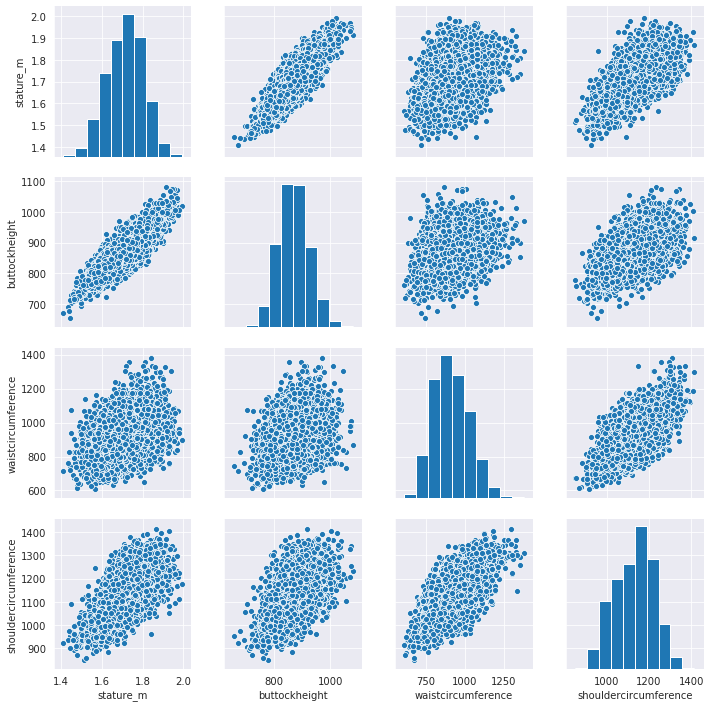

In [11]:
sns.pairplot(ansur_df)
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

In [15]:
from sklearn.decomposition import PCA

pca = PCA()
pc = pca.fit_transform(ansur_std)

# This changes the numpy array output back to a dataframe
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

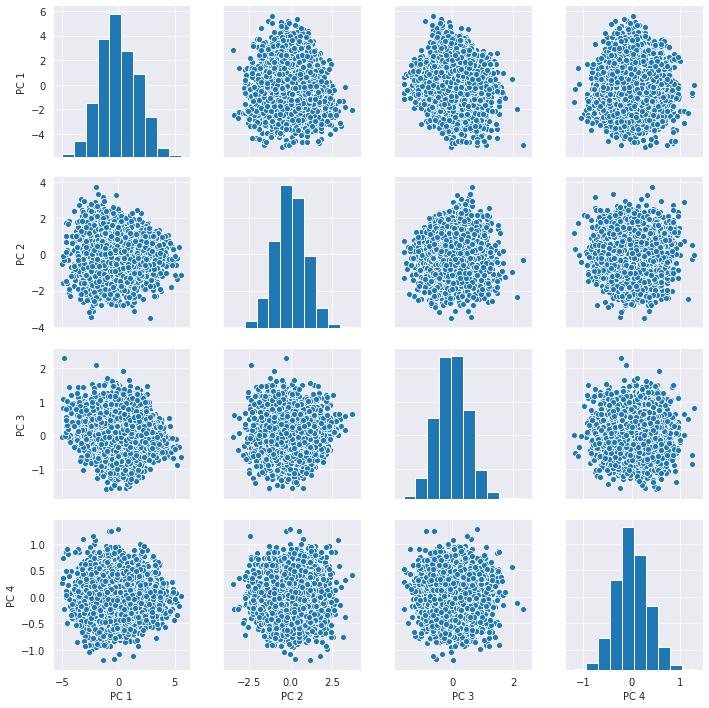

In [16]:
# Create a pairplot of the principal component dataframe
sns.pairplot(pc_df)
plt.show()

Notice how, in contrast to the input features, none of the principal components are correlated to one another.

In [17]:
ansur_df = X[['stature_m', 'buttockheight', 'waistdepth', 'span', 'waistcircumference', 'shouldercircumference', 
              'footlength', 'handlength', 'functionalleglength', 'chestheight', 'chestcircumference',
              'cervicaleheight', 'sittingheight']]

In [19]:
# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

[6.96695776e-01 1.65318195e-01 4.41759304e-02 3.10140882e-02
 1.96244729e-02 1.05810800e-02 1.00183486e-02 7.58854596e-03
 5.29894105e-03 4.64328943e-03 2.69987761e-03 1.87568473e-03
 4.65770148e-04]


In [ ]:
!jupyter nbconvert --to html 4_Feature_extraction.ipynb

In [ ]:
!../gitbsh > /dev/null 2>&1